In [3]:
import qiskit
import numpy as np
from qiskit.quantum_info import Statevector, StabilizerState
import nqs_models
from exact_solvers import GenericExactState
import utils
import torch

import Helper_fun_new as helper
import NSQST_Pre_Trainer_GHZ as shadow_trainer

from qiskit import QuantumCircuit, execute, Aer
import qiskit.providers.aer.noise as noise
import cirq
import json
import pickle
from qiskit.quantum_info import StabilizerState, Pauli

In [8]:
N = 40

max_iters_=200
nsqst_lr=1e-2
batch_size_=200
num_samples_ = 5000
K_ = 1

# we first load the amplitude NN with trained parameters
nqs_model_amp = nqs_models.TransformerWF( num_sites = N,
                                        num_layers=3,
                                        internal_dimension=8,
                                        num_heads=4,
                                        dropout=0.0,
                                        phase_mode = 0)

nqs_model_amp.load_state_dict(torch.load('data/param_GHZ_pre_amp_N40'))

nqs_model_phase = nqs_models.TransformerWF_phase( num_sites = N,
                                        num_layers=3,
                                        internal_dimension=8,
                                        num_heads=4,
                                        dropout=0.0,
                                        phase_mode = 2)


optimizer_ = torch.optim.Adam(nqs_model_phase.parameters(), lr=nsqst_lr)

state_file_name_amp =\
'data/param_GHZ_pre_amp_N'+str(N) 
state_file_name_phase =\
'data/param_GHZ_pre_phase_N'+str(N)

f_name = 'data/phi_list_' + str(N) + '.json'
phi_list = cirq.read_json(json_text=json.load(open(f_name)) )

shadow_trainer_driver = shadow_trainer.ShadowTomographyTrainer(
                    N = N,
                    nqs_model_amp = nqs_model_amp,
                    nqs_model_phase = nqs_model_phase,
                    phi_list = phi_list,
                    optimizer = optimizer_,
                    max_iters = max_iters_,
                    num_samples = num_samples_,
                    batch_size = batch_size_,
                    K = K_,
                    state_file_name_amp = state_file_name_amp, 
                    state_file_name_phase = state_file_name_phase)

exact_nsqst, loss_nsqst = shadow_trainer_driver.train()

np.savetxt('data/loss_GHZ_pre_phase_N'+str(N), loss_nsqst)
np.savetxt('data/exact_GHZ_pre_phase_N'+str(N), exact_nsqst)

Iteration 0
Cost function is 0.07788845493534835
Exact infidelity is 0.847686555338967
Iteration 1
Cost function is 0.8244965936040166
Exact infidelity is 0.587129176650022
Iteration 2
Cost function is 0.6025775604129257
Exact infidelity is 0.01076542458526586
Iteration 3
Cost function is 0.0031744019885571184
Exact infidelity is 0.2784748212274365
Iteration 4
Cost function is 0.19056860116112517
Exact infidelity is 0.3945284331960802
Iteration 5
Cost function is 0.302003276246667
Exact infidelity is 0.24123371552575434
Iteration 6
Cost function is 0.1600940876216138
Exact infidelity is 0.04314007919389562
Iteration 7
Cost function is -0.001945819959812578
Exact infidelity is 0.01920193180149865
Iteration 8
Cost function is 0.016216753142459517
Exact infidelity is 0.10183954864194256
Iteration 9
Cost function is 0.1169821157100196
Exact infidelity is 0.08947727444363407
Iteration 10
Cost function is 0.10577497664562086
Exact infidelity is 0.022311917435912987
Iteration 11
Cost function

Iteration 90
Cost function is -0.016929950344330313
Exact infidelity is 0.005095394128871833
Iteration 91
Cost function is -0.025434586806837745
Exact infidelity is 0.005476174561354741
Iteration 92
Cost function is -0.021201219662327242
Exact infidelity is 0.006017331970955664
Iteration 93
Cost function is -0.023941403112872406
Exact infidelity is 0.006237123700327918
Iteration 94
Cost function is -0.0168615964951071
Exact infidelity is 0.006203474058980474
Iteration 95
Cost function is -0.015940495152302114
Exact infidelity is 0.0057819047819897
Iteration 96
Cost function is -0.02262981446346024
Exact infidelity is 0.0053213798353087816
Iteration 97
Cost function is -0.02108628175951388
Exact infidelity is 0.005221231179441399
Iteration 98
Cost function is -0.021109702448175893
Exact infidelity is 0.0052288393860006055
Iteration 99
Cost function is -0.028343129205312234
Exact infidelity is 0.005505299549726672
Iteration 100
Cost function is -0.023606960924146048
Exact infidelity is 0

Iteration 178
Cost function is -0.027705661492521072
Exact infidelity is 0.006245982717609566
Iteration 179
Cost function is -0.013865017016676084
Exact infidelity is 0.006528565231749606
Iteration 180
Cost function is -0.01646100202958234
Exact infidelity is 0.006279422965092651
Iteration 181
Cost function is -0.0306913494107115
Exact infidelity is 0.005983626228816874
Iteration 182
Cost function is -0.02132226432872053
Exact infidelity is 0.005681229256329856
Iteration 183
Cost function is -0.012628580201704764
Exact infidelity is 0.005316961421632849
Iteration 184
Cost function is -0.025420136843164576
Exact infidelity is 0.00490532283824785
Iteration 185
Cost function is -0.014924156043206294
Exact infidelity is 0.0049039317375692
Iteration 186
Cost function is -0.015184629556467266
Exact infidelity is 0.005394530699901923
Iteration 187
Cost function is -0.0196605882651939
Exact infidelity is 0.006200403324499226
Iteration 188
Cost function is -0.014197698949680593
Exact infidelity

Text(0, 0.5, 'Infidelity')

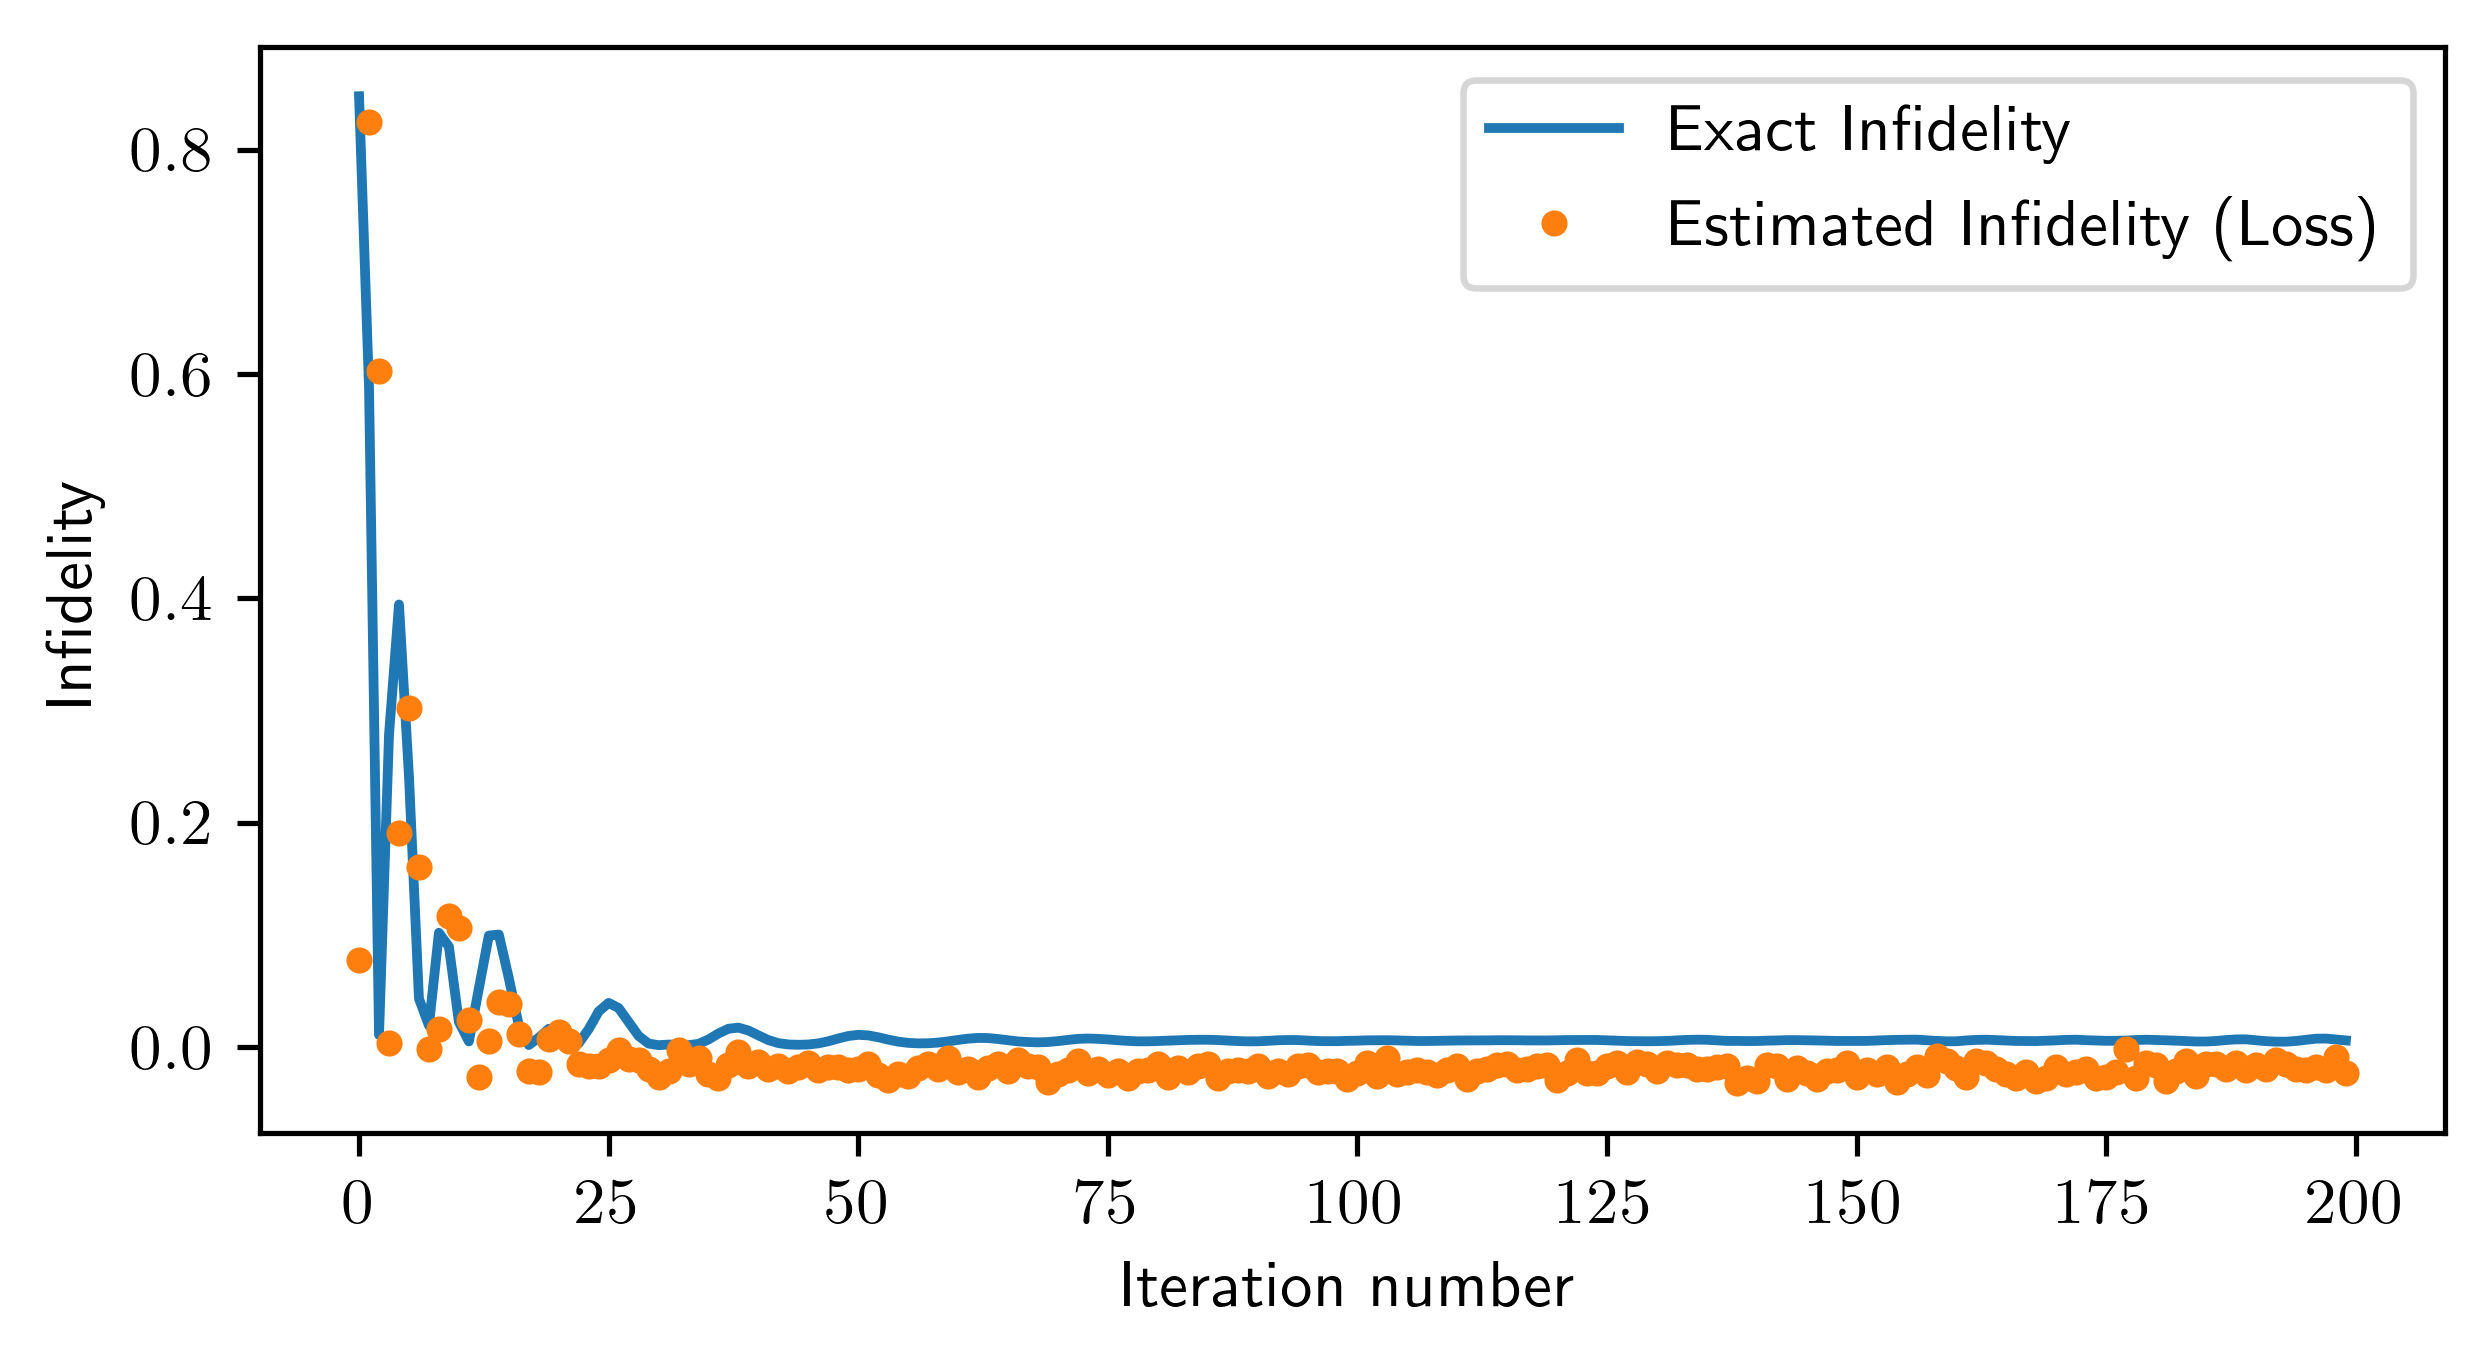

In [9]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 470
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (6,3)

iters_nsqst = np.linspace(0,len(loss_nsqst)-1, len(loss_nsqst))
plt.plot(iters_nsqst, exact_nsqst, label = 'Exact Infidelity')
plt.plot(iters_nsqst, loss_nsqst, '.', label = 'Estimated Infidelity (Loss)')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Infidelity')